In [1]:
from IPython.display import Image

# A "Quick", Broad Introduction to Causal Inference

#### (from an elementary, mostly observational point-of-view)

### Outline

* The What and Why of Causality
* The Need for Causal Inference on Observational Data
* Qualitative Method
    - Hill Criterion 
* Some Established Formal Methods
    - Matched Sampling (Rubin et al.)
    - Graphical Models (Pearl, Spirtes et al.)
    - Granger Causality (Granger)
* Possible Shortcomings

## What is causality?

To be honest, there is no universally accepted definition...

...but I'll help bolster your intuition.

## Why care about causality?

* Prediction vs Explanation
 - Prediction alone is scientifically unsatisfying.
 - Based on conversations with team (What the heck is random forest doing?). 

* But explanation alone might not be enough either...

> The future of machine learning is to **control** (the world). - Pedro Ortega

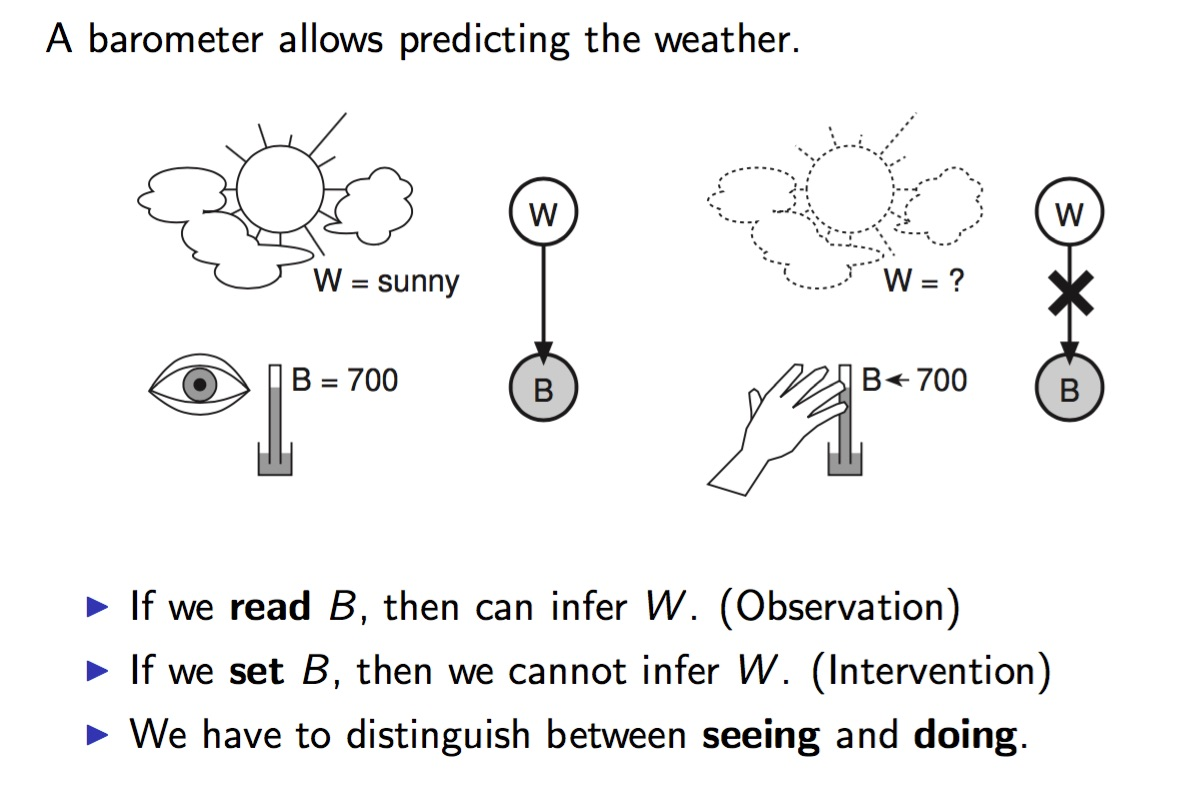

In [2]:
Image('pics/barometer.jpg', width=800, height=800)
# Pedro's slide

### Seeing vs Doing

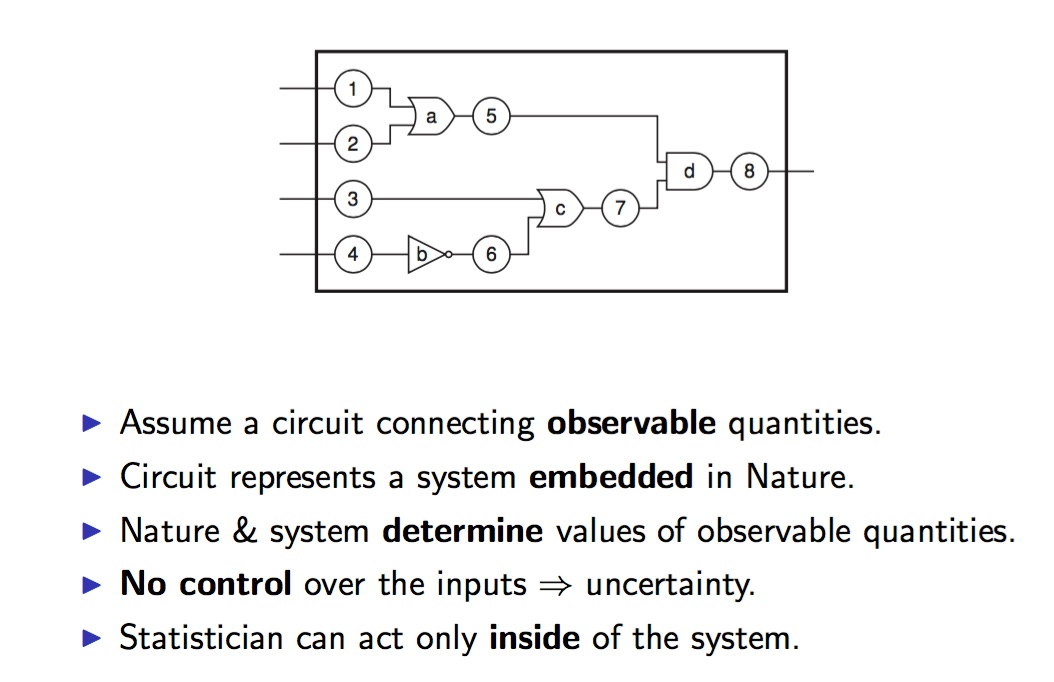

In [3]:
Image('pics/seeing-v-doing.jpg', width=800, height=800)
# Pedro's slide

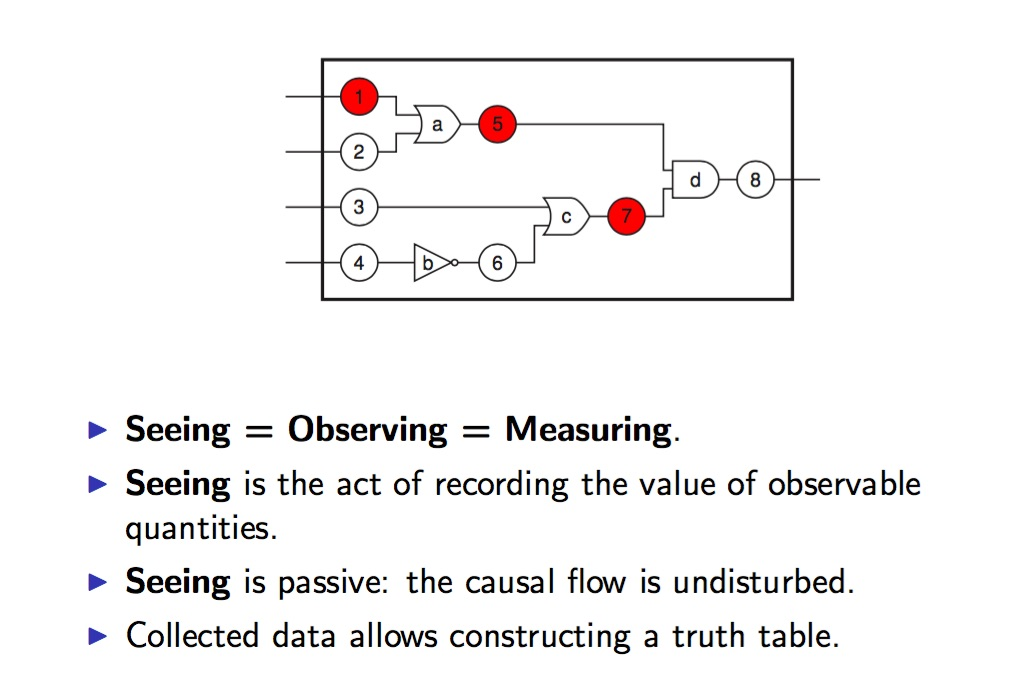

In [4]:
Image('pics/seeing-v-doing2.jpg', width=800, height=800)
# Pedro's slide

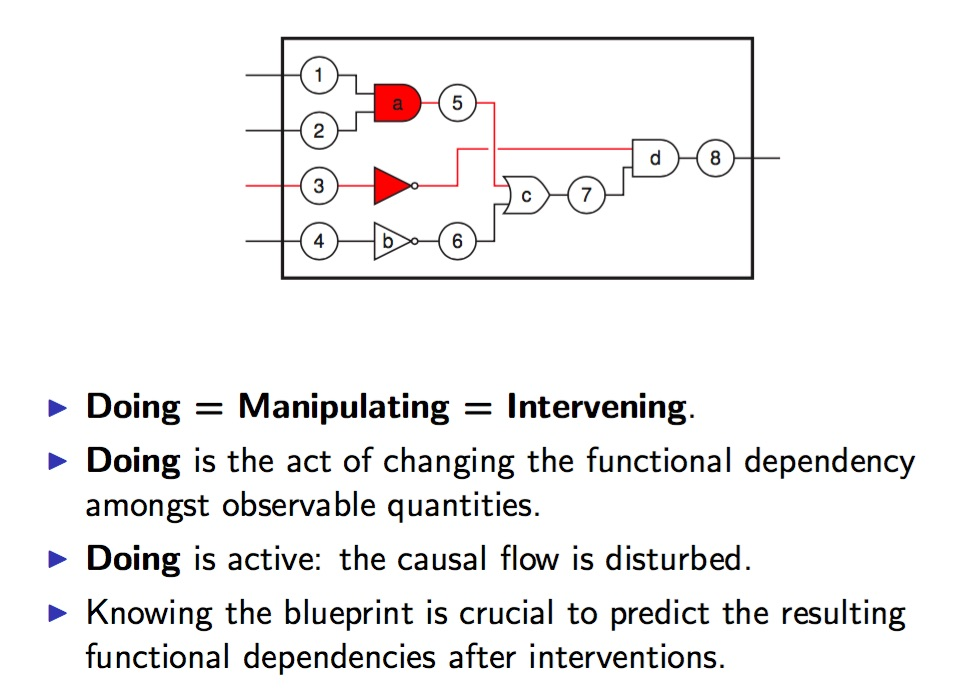

In [6]:
Image('pics/seeing-v-doing4.jpg', width=800, height=800)
# Pedro's slide

## Why is causal inference hard?

* Confounders - extraneous random variables that correlate with the dependent and independent variables and may lead to spurious associations.

* Selection bias - A nonrandom assignment of treatment on the units in the data.

## Why is causal inference hard?

* **Fundamental Problem of Causal Inference**: Since it is impossible to see both potential outcomes at once, one of the potential outcomes is always missing. Hence, it is impossible to observe the causal effect on a single unit.

* ... so you will likely have to reason about things that never happened (aka counterfactuals).

* The Gold Standard (Randomized Experiments) tends not to be feasible, cost-effective, or ethical.

## Why is causal inference hard?

* Assumptions, assumptions, and more assumptions...

> ...in the causal inference setting, assumptions are always needed, and it is imperative that they be explicated and justified. - Rubin, Donald B. "Causal inference using potential outcomes." Journal of the American Statistical Association (2011).

\* Not clear how generalizable randomized experiments are. More on that later.

## The Rise of Causal Inference Methods on Observational Data

* Observational Studies pose a problem since they do not randomly assign treatments to units, which can lead to confounders and biased estimates of treatment effects.

* Around 1980+: Donald Rubin (Statistician), Judea Pearl (Computer Scientist), Spirtes/Glymour/Scheines (Philosophers) vs **Statistics** (with capital "S")

* This movement involved creating methods that either try to emulate randomized experiments (by reducing confounding bias) or represent causal structure in a new, yet intuitive way.

* On May 31, 2013:

> ...causality has come from being a liability to being an asset. - Judea Pearl at the Simons Institute for the Theory of Computing at UC Berkeley.

## A Qualitative Method

* Causal Inference via checklist.

### Hill's Criterion

* Basically a checklist of the following:

* Strength (of association)

* Consistency (reproducibility)

* Specificity (cause leading to a particular effect)

* Temporality (cause $\rightarrow$ effect)

* Biological Gradient (increase/decrease of cause -> increase/decrease of effect)

* Plausibility (existence of a mechanism between cause and effect)

* Coherence (does not contradict past relevant research)

* Experiment (self-explanatory)

* Analogy (are we more likely to accept analogous cause/effect relationships? E.g. *Virus A -> Cancer B* makes *Virus A' -> Cancer B'* more plausible)

### This method was recently used to confirm a causal link in an important current event

* Zika virus and birth defects.

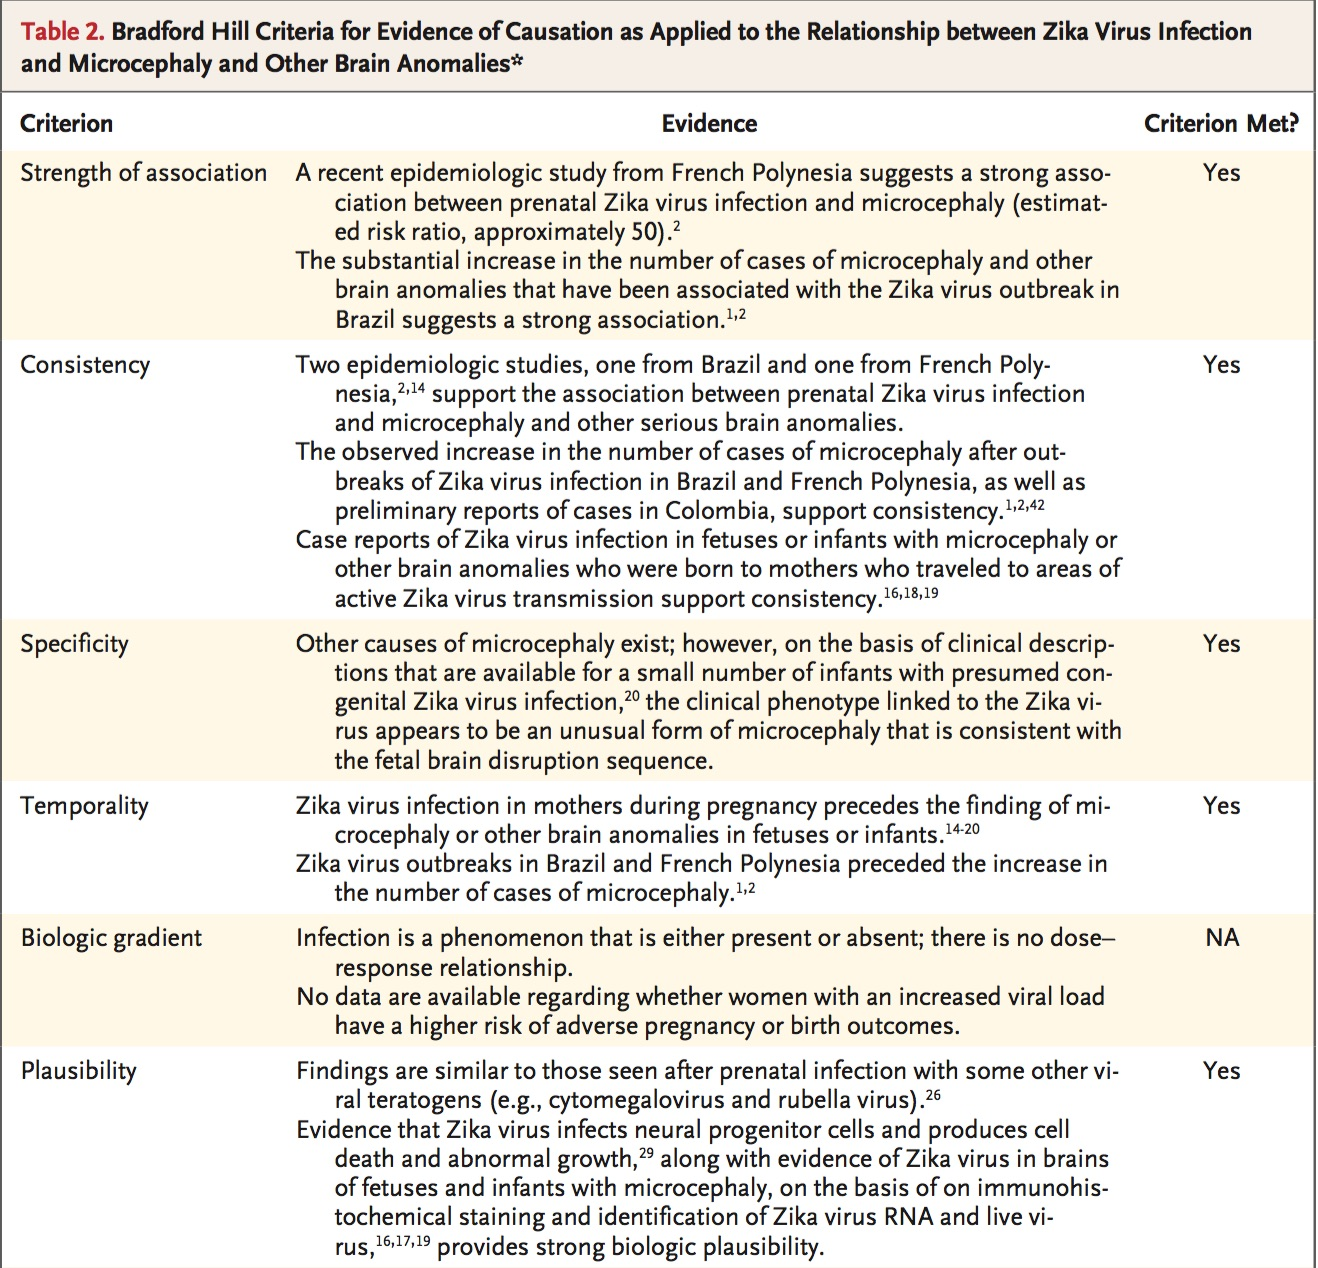

In [7]:
Image('pics/zika-hill.jpg', width=800, height=800)

## Rubin-Neyman Causal Model

* Ideally we would want to measure the **effects of causes** in terms of potential outcomes:

$$Y_i(1) − Y_i(0) \text{ for unit } i$$

* The framework tries to find solutions to the Fundamental Problem of Causal Inference (since you can't evaluate both $Y_i(1)$ and $Y_i(0)$).

* Gold Standard Solution: Use randomized experiements to measure the **average** effect of the cause/treatment.

>Randomized controlled trial(/Randomized Experiment): (RCT) A study in which people are allocated at random (by chance alone) to receive one of several clinical interventions. One of these interventions is the standard of comparison or control. The control may be a standard practice, a placebo ("sugar pill"), or no intervention at all. (...) RCTs seek to measure and compare the outcomes after the participants receive the interventions. - http://www.medicinenet.com/script/main/art.asp?articlekey=39532

* Why look for **effects of causes** instead of **causes of effects**?

> Reverse causal inference (finding causes of effects) is another story. As has long been realized, the effects of action X flow naturally forward in time, while the causes of outcome Y cannot be so clearly traced backward. Did the North Vietnamese win the American War because of the Tet Offensive, or because of American public opinion, or because of the skills of General Giap, or because of the political skills of Ho Chi Minh, or because of the conflicted motivations of Henry Kissinger, or because of Vietnam’s rough terrain, or ...? To ask such a question is to reveal the impossibility of answering it. - Andrew Gelman, http://andrewgelman.com/2010/03/04/causality_and_s/

### Some Rubin-Neyman Model Assumptions

* Stable Unit Treatment Value Assumption (SUTVA):
    1. There is no interference between units.
    2. There are no hidden versions of treatments; no matter how unit $i$ received treatment 1, the outcome that would be observed would be $Y_i(1)$ and similarly for treatment 0.

## Matched Sampling

* Attempts to reduce bias and increase precision in observational studies by finding one (or more) non-treated unit(s) that "match" for every treated unit. Think "preprocessing for causal inference".

* Specifically, Matched Sampling attempts to match every treatment unit  in some arbitrary sequence to the nearest control unit, using a chosen distance metric.

* Part of the Rubin-Neyman Causal Model but attempts to solve the Fundamental Problem of Causal Inference on observational data.

### Propensity Score Matching

* For a unit $x_i \in X$ (random variable), the propensity score ($\pi_i$) of $x_i$ is,

$$\pi_i ≡ Pr(T_i = 1|X = x_i)$$

In practice, people tend to use the sigmoid function to represent the propensity score:

$$ Pr(T_i = 1|X = x_i) = \frac{1}{1 + e^{-x_iβ}} $$

where $\beta$ is the parameter derived from the data using logistic regression.

* Hence, for another unit $x_j \in X$ and its corresponding propensity score $\pi_j$, 

$$ \pi_i - \pi_j $$

is the distance between the units.

### Mahalanobis Distance Matching

* Measure the distance between two units with the following:

$$ M(X_i,X_j) =  \sqrt{(X_i − X_j)^{T}S^{−1}(X_i −X_j)} $$

where $S$ is the sample covariance matrix of $X$ (all the units).

## Graphical Models under Causal Interpretation

* Represents causal relationships as directed acyclic graphs (DAGs).

* Pioneered by Pearl, Spirtes et al., Philip Dawid, and others.

### Essence of Causal Discovery

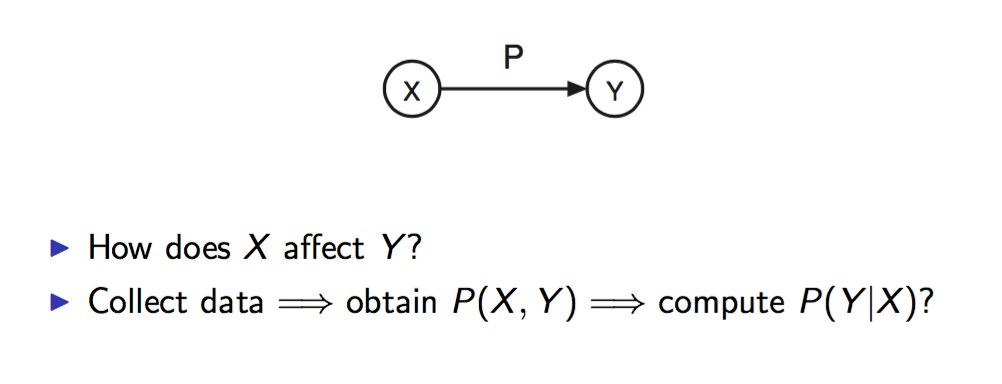

In [8]:
Image('pics/essence-of-causal-discovery.jpg', width=800, height=800)
# Pedro's slide

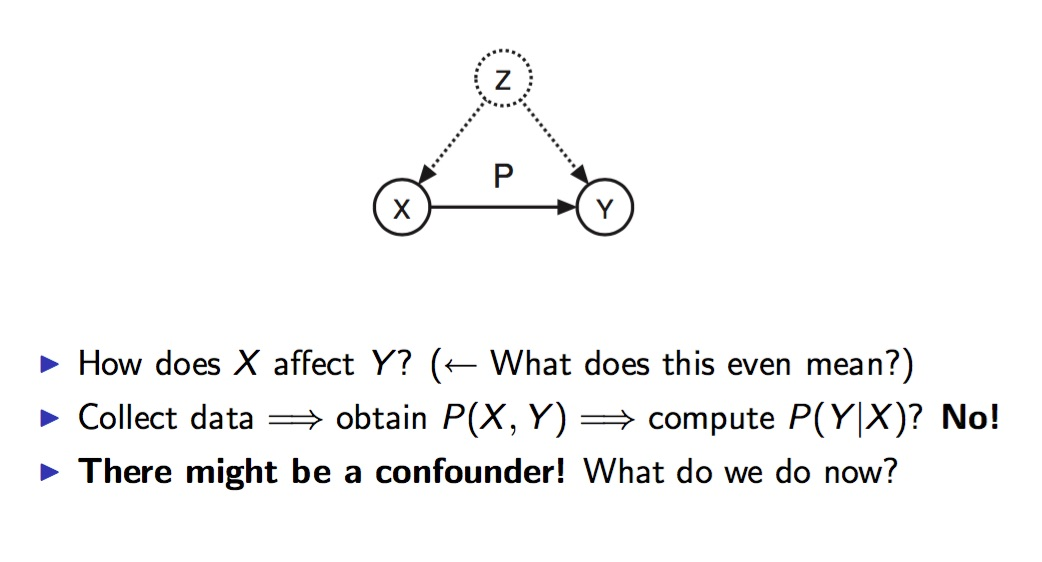

In [9]:
Image('pics/essence-of-causal-discovery2.jpg', width=800, height=800)
# Pedro's slide

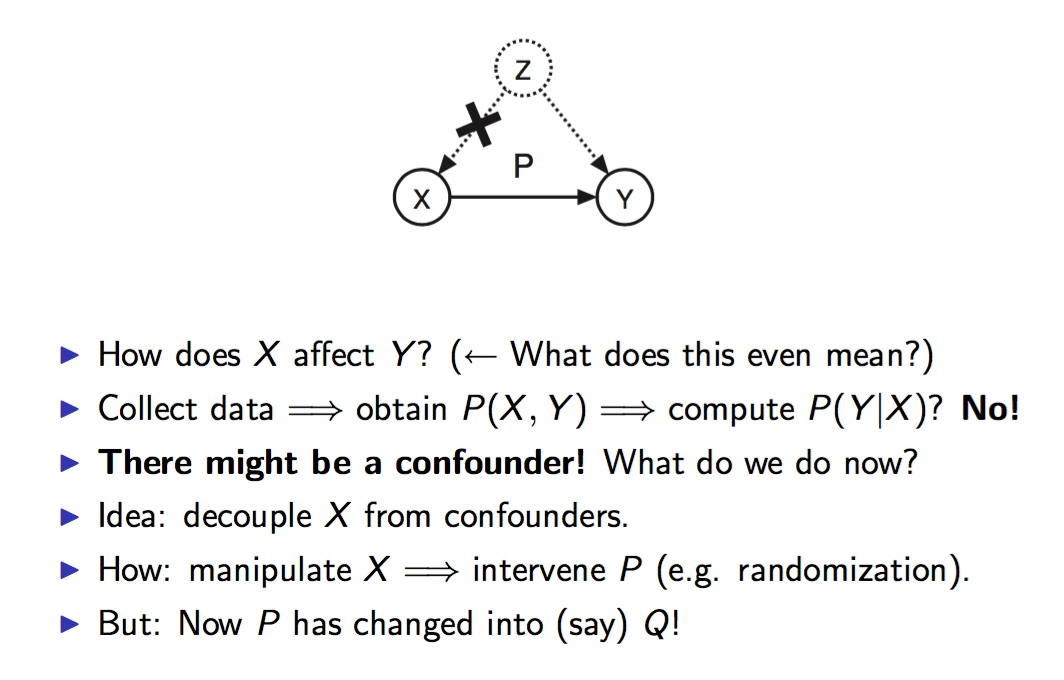

In [10]:
Image('pics/essence-of-causal-discovery3.jpg', width=800, height=800)
# Pedro's slide

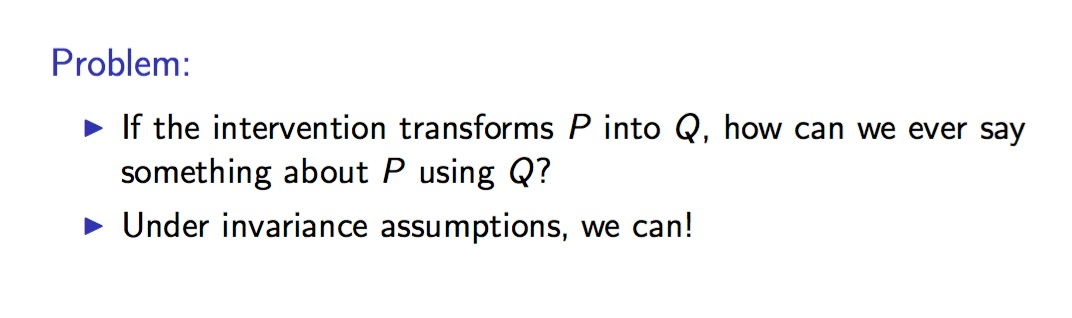

In [11]:
Image('pics/intervention.jpg', width=800, height=800)
# Pedro's slide

### Graphical Model Causality Assumptions

* **Causal Sufficiency**: Your set of random variables contains **all** the relevant variables. That is, there are no unmeasured common causes.

* **Causal Markov Condition**: For causally sufficient sets of variables, all variables are independent of their noneffects (nondescendants in the causal graph) conditional on their direct causes (parents of the graph).

* **Faithfulness Condition**: A causal graph $G$ and a probability distribution $P$ over $G$ are faithful to one another if all and only the conditional independence relations true in $P$ are entailed by the Causal Markov condition applied to $G$.

### d-separation

A path $p$ is blocked by a set of nodes $Z$ if and only if
1. $p$ contains a chain of nodes $A \rightarrow B \rightarrow C$ or a fork $A \leftarrow B \rightarrow C$ such that the middle node $B$ is in $Z$ (i.e., $B$ is conditioned on), or
2. $p$ contains a collider $A → B ← C$ such that the collision node $B$ is not in $Z$, and no descendant of $B$ is in $Z$.

If $Z$ blocks every path between two nodes $X$ and $Y$, then $X$ and $Y$ are **d-separated**, conditional on $Z$, and thus are independent conditional on $Z$.

Assuming the Causal Markov Condition, one needs only to look at nodes and edges to determine conditional independence on the graph!

> d-separation is just as important as modus ponens. - Clark Glymour

### Graphical Models: Causal Querying

* Graphical Models provide a framework for causal inference in which DAGs are queried to determine if the assumptions available are sufficient for identifying causal effects from observational data.*

\* Pearl, Judea. "Causal diagrams for empirical research." Biometrika 82.4 (1995): 669-688.

#### The do-operator - a formalization for intervention

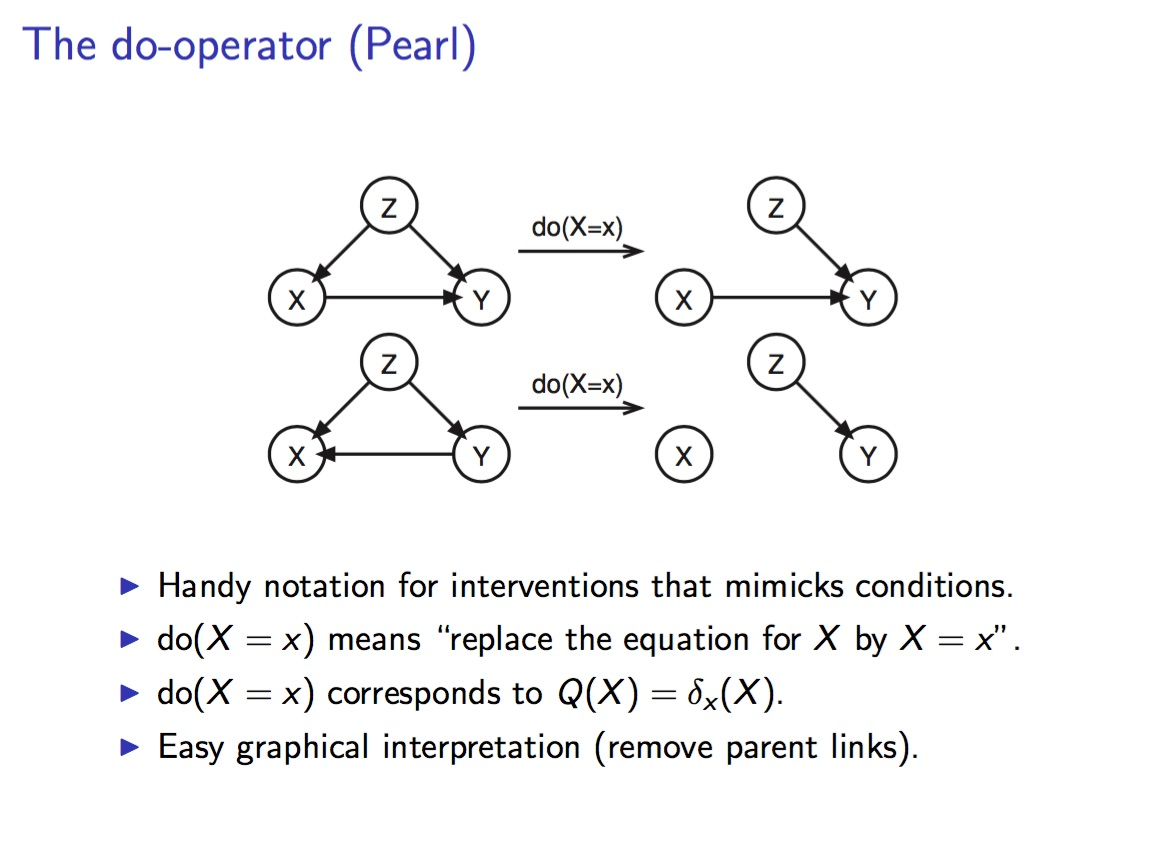

In [12]:
Image('pics/do-operator.jpg', width=800, height=800)
# An answer to dealing with confounders.
# Pedro's slide

#### The do-calculus - inference rules for intervention

For a DAG $G$, let $G_{\overline{X}}$ be the graph obtained by deleting from $G$ all arrows pointing to nodes in $X$. Also, let $G_{\underline{X}}$ be the graph obtained by deleting from $G$ all arrows emerging from nodes in $X$.

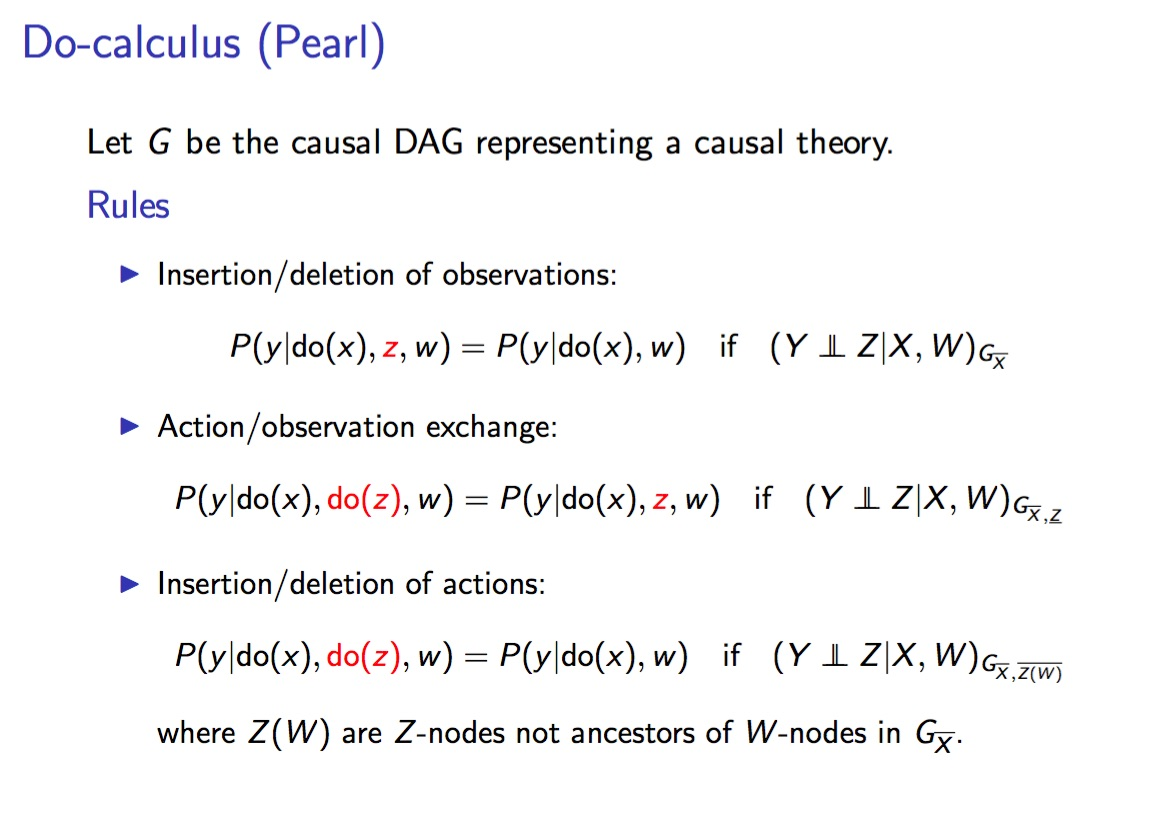

In [13]:
Image('pics/do-calculus.jpg', width=800, height=800)
# Facilitates the identification of causal effects.

### Graphical Models: Causal Discovery and Search

* Given a set of random variables, construct a DAG as your causal graph.

#### PC (Peter-Clark) algorithm

##### General idea: 
* Begin with a graph where all variables are connected in all possible ways with undirected edges.

   * For each pair of variables currently connected by an edge, check if there are other sets of adjacent variables that render them independent. That is, keep adding to the set adjacent variables that are conditioned on the pair in question and check if the pair is independent given that set. If so, remove that edge.

 * After removing edges from the fully connected graph, assign a directed edge to each pair if it satisfies some criteria (e.g. orient $X *-* Y *-* Z$ as $X *\rightarrow Y \leftarrow* Z$ if and only if $X$ and $Z$ are not d-separated given $Y$).

## Granger Causality: Explicitly accounting for time.

* One time series $X$ at time $t$ is said to *Granger-cause* another time series $Y$ at time $t+1$ if $W_t$ being all available knowledge up until time $t$: 
$$P(Y_{t+1}|W_t) \neq P(Y_{t+1}|W_t - X_t)$$

## Shortcomings of Established Methods

* They tend to heavily rely on unrealistic assumptions.

* (Except for Granger causality) Methods don't account for time.

* Is Granger Causality **really** causality?

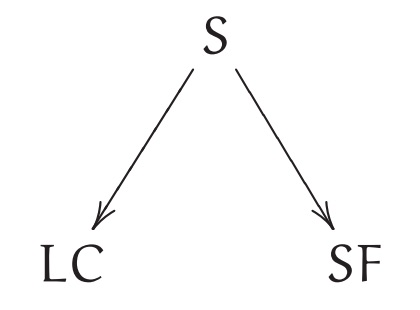

In [2]:
Image("pics/smoking-graph.jpg", width=400, height=400)

$$P(LC_{t+1}|W_t) \neq P(LC_{t+1}|W_t - SF_t)$$

* Some methods just might not even work!\*

\* King, Gary, and Richard Nielsen. "Why Propensity Scores Should Not Be Used for Matching." Copy at http://j.mp/1sexgVw Export BibTex Tagged XML Download Paper 481 (2015).

## Penn Medicine needs causal inference, but first ask yourself:

* What is the problem?

* Can you just do a randomized experiment?

* Why isn't prediction accuracy enough?

* How can we construct relevant causal models of our projects at Penn Medicine?

### Books on Causality

* Imbens, Guido W., and Donald B. Rubin. Causal inference in statistics, social, and biomedical sciences. Cambridge University Press, 2015.

* Pearl, Judea. Causality. Cambridge university press, 2009.

* Judea Pearl, Madelyn Glymour, Nicholas P. Jewell. Causal Inference in Statistics: A Primer. Wiley, 2016 (textbook)

* Spirtes, Peter, Clark N. Glymour, and Richard Scheines. [Causation, prediction, and search](https://www.cs.cmu.edu/afs/cs.cmu.edu/project/learn-43/lib/photoz/.g/scottd/fullbook.pdf). MIT press, 2000.

### Citations
* [Pedro Ortega's Slides](http://www.adaptiveagents.org/_media/causality.pdf)
* Eberhardt, Frederick. "Introduction to the Epistemology of Causation." Philosophy Compass 4.6 (2009): 913-925.
* Hitchcock, Christopher, "Probabilistic Causation", The Stanford Encyclopedia of Philosophy (Winter 2012 Edition), Edward N. Zalta (ed.), URL = <http://plato.stanford.edu/archives/win2012/entries/causation-probabilistic/>.

* Holland, Paul W. "Statistics and causal inference." Journal of the American statistical Association 81.396 (1986): 945-960.
* King, Gary, et al. "Comparative effectiveness of matching methods for causal inference." Unpublished manuscript 15 (2011).
* King, Gary, and Richard Nielsen. "Why Propensity Scores Should Not Be Used for Matching." Copy at http://j.mp/1sexgVw Export BibTex Tagged XML Download Paper 481 (2015).

* Kleinberg, Samantha, and George Hripcsak. "A review of causal inference for biomedical informatics." Journal of biomedical informatics 44.6 (2011): 1102-1112.
* Pearl, Judea. "Causal diagrams for empirical research." Biometrika 82.4 (1995): 669-688.
* Rasmussen, Sonja A., et al. "Zika virus and birth defects—reviewing the evidence for causality." New England Journal of Medicine (2016).
* Rubin, Donald B. "Causal inference using potential outcomes." Journal of the American Statistical Association (2011).
* Spirtes, Peter, and Kun Zhang. "Causal discovery and inference: concepts and recent methodological advances." Applied Informatics. Vol. 3. No. 1. Springer Berlin Heidelberg, 2016.
